# Classification of Leukaemia by Gene Expression

## Import Libraries

In [220]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import seaborn as sns

## Import Data

In [221]:
# Training Dataset
training_data = pd.read_csv('Data/data_set_ALL_AML_train.csv')
training_data.head()

#training_data.shape
# output: (7129, 78) 

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [222]:
# Labels for the Training Set
labels = pd.read_csv('Data/actual.csv', index_col='patient')
labels.head()

#labels.shape
# output: (72, 1)

,cancer
patient,
1,ALL
2,ALL
3,ALL
4,ALL
5,ALL


In [223]:
# Test Dataset
test_data = pd.read_csv('Data/data_set_ALL_AML_independent.csv')
test_data.head()

#test_data.shape
# output: (7129, 70)

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


## Data Exploration

In [245]:
# Check for missing values
training_data[training_data.isnull().any(axis=1)]

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33


In [246]:
test_data[test_data.isnull().any(axis=1)]

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62


In [247]:
labels[labels.isnull().any(axis=1)]

,cancer
patient,


## Data Cleaning

In [225]:
# extraction of the call columns
test_call = test_data[[col for col in test_data.columns if 'call' in col]]
train_call = training_data[[col for col in training_data.columns if 'call' in col]]

# drop call columns from orginal datasets
test_data.drop([col for col in test_data.columns if 'call' in col], 
               axis=1, 
               inplace=True)
training_data.drop([col for col in training_data.columns if 'call' in col],
                  axis=1,
                  inplace=True)

train_call.head()

,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,call.8,call.9,...,call.28,call.29,call.30,call.31,call.32,call.33,call.34,call.35,call.36,call.37
0,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
1,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
2,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
3,A,A,A,A,A,A,A,A,A,M,...,A,A,A,P,A,A,A,P,A,A
4,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A


In [226]:
test_call.head()

,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,call.8,call.9,...,call.24,call.25,call.26,call.27,call.28,call.29,call.30,call.31,call.32,call.33
0,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
1,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
2,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
3,A,A,A,A,A,A,A,A,A,A,...,P,A,A,A,A,A,A,A,A,A
4,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A


In [227]:
# Convert the Strings to Integers
call_map = {'A':0,
           'P':1,
           'M':2}

train_call = train_call.replace(call_map)
test_call = test_call.replace(call_map)

train_call.head()

,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,call.8,call.9,...,call.28,call.29,call.30,call.31,call.32,call.33,call.34,call.35,call.36,call.37
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
test_call.head()

,call,call.1,call.2,call.3,call.4,call.5,call.6,call.7,call.8,call.9,...,call.24,call.25,call.26,call.27,call.28,call.29,call.30,call.31,call.32,call.33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
# Change row and columns names
train_rownames = "Call" + training_data.iloc[:,1]
train_call.index = train_rownames

test_rownames = "Call" + test_data.iloc[:,1]
test_call.index = test_rownames

ids_train = list(training_data.columns[2:])
ids_test = list(test_data.columns[2:])

train_call.columns = ids_train
test_call.columns = ids_test

train_call.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
CallAFFX-BioB-5_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CallAFFX-BioB-M_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CallAFFX-BioB-3_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CallAFFX-BioC-5_at,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,1,0,0
CallAFFX-BioC-3_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
test_call.head()

,39,40,42,47,48,49,41,43,44,45,...,54,57,58,60,61,65,66,63,64,62
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
CallAFFX-BioB-5_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CallAFFX-BioB-M_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CallAFFX-BioB-3_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CallAFFX-BioC-5_at,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
CallAFFX-BioC-3_at,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
# Transpose the data
train_call = train_call.T
train_call.head()

test_call = test_call.T
test_call.head()

Gene Accession Number,CallAFFX-BioB-5_at,CallAFFX-BioB-M_at,CallAFFX-BioB-3_at,CallAFFX-BioC-5_at,CallAFFX-BioC-3_at,CallAFFX-BioDn-5_at,CallAFFX-BioDn-3_at,CallAFFX-CreX-5_at,CallAFFX-CreX-3_at,CallAFFX-BioB-5_st,...,CallU48730_at,CallU58516_at,CallU73738_at,CallX06956_at,CallX16699_at,CallX83863_at,CallZ17240_at,CallL49218_f_at,CallM71243_f_at,CallZ78285_f_at
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
48,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [232]:
# CREATE Y VARIABLES

# convert ids into intergers
train_ids = train_call.index
train_ids = list(map(int, train_ids))

test_ids = test_call.index
test_ids = list(map(int, test_ids))


# create label dfs for train and test data
train_labels = []
test_labels = []

for i in train_ids:
    train_labels.append(labels.iloc[i-1,0])
    
for i in test_ids:
    test_labels.append(labels.iloc[i-1,0])
    
train_labels = pd.concat([pd.DataFrame(train_ids), pd.DataFrame(train_labels)], 
                         axis=1, 
                         ignore_index=False)
train_labels.columns = ['patient', 'cancer']

test_labels = pd.concat([pd.DataFrame(test_ids), pd.DataFrame(test_labels)],
                       axis=1,
                       ignore_index=False)
test_labels.columns = ['patient', 'cancer']

# extract the labels for the y variables
y_train = train_labels.iloc[:,1]
y_test = test_labels.iloc[:,1]

# turn strings to integers
y_map = {'ALL':0, 'AML':1}

y_train = y_train.replace(y_map)
y_train = list(y_train)

y_test = y_test.replace(y_map)
y_test = list(y_test)

In [233]:
# CREATE X VARIABLES
gene_names = training_data.iloc[:,1]

x_train = training_data.iloc[:,2:]
x_train = x_train.T
x_train.columns = gene_names
x_train.index = train_ids

x_test = test_data.iloc[:,2:]
x_test = x_test.T
x_test.columns = gene_names
x_test.index = test_ids

#x_train.head()
#x_test.head()

## Exploaratory Data Analysis

### Distribution of Classes

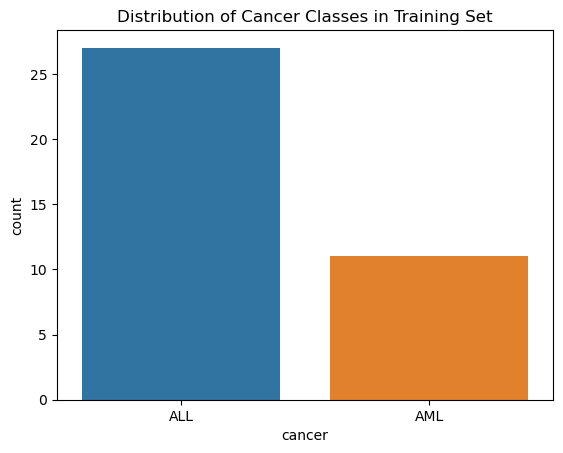

In [234]:
sns.countplot(x='cancer', 
              data=train_labels)
plt.title("Distribution of Cancer Classes in Training Set")

plt.show()

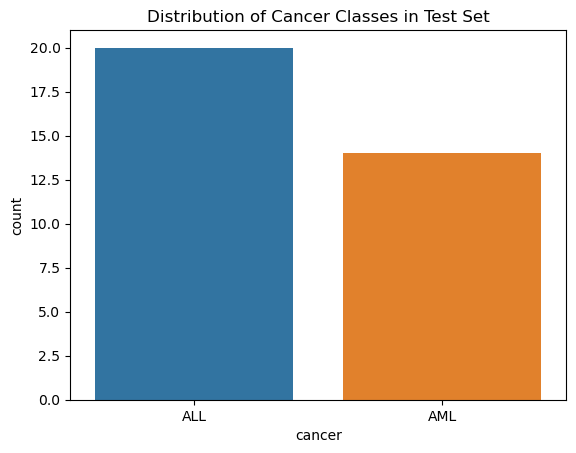

In [235]:
sns.countplot(x='cancer',
             data=test_labels)
plt.title("Distribution of Cancer Classes in Test Set")

plt.show()

The classes are very imbalanced in both datasets.

## Data Normalization

## Creating Random Forest Machine Learning Model

In [257]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)


## Model Fit

In [264]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        20
           1       1.00      0.50      0.67        14

    accuracy                           0.79        34
   macro avg       0.87      0.75      0.76        34
weighted avg       0.85      0.79      0.78        34



(Class 0 = ALL; Class 1 = AML)
With an adequate recall (0.79) and precision (0.85) in its classification of patients into ALL or AML, this model performs admirably and has a good F1 score of 0.78.

The model classifies those with ALL with high precision (0.74), perfect recall (1.00) and  a F1 score of 0.85. 
The model classifies those with AML with perfect precision, however, recall is relatively low (0.5), which results in a lower F1 score. 
Overall, this indicates that patients with ALL are classified more accurately by the model than patients with AML. This could be due to the fact that the samples have significantly more patients in the training sample with ALL than AML.

In summary, these metrics  indicate that the classification model performs reasonably well. However, further refinement may be necessary to enhance its efficacy, particularly in accurately identifying individuals with AML.

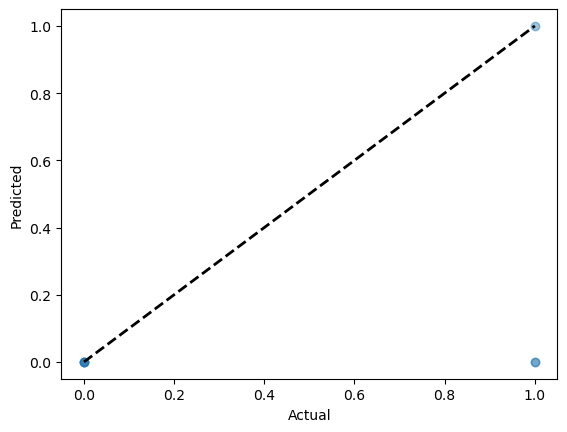

In [239]:
plt.scatter(y_test, predictions, alpha=0.1)
plt.plot([np.array(y_test).min(), np.array(y_test).max()], 
         [np.array(y_test).min(), np.array(y_test).max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [240]:
# F1-score, precision, accuracy, and ROC-AUC scores

In [241]:
# Confusion Matrix

In [242]:
### Feature Importance

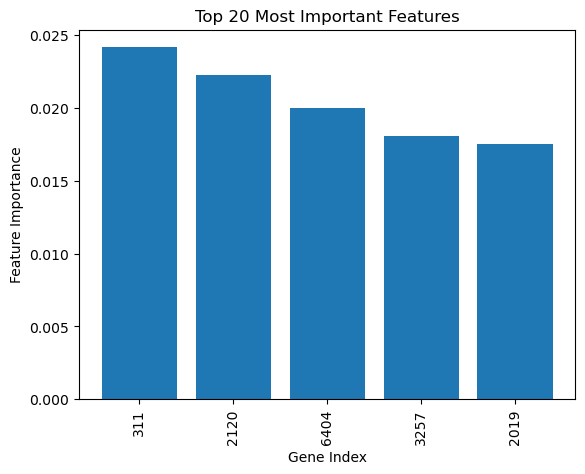

In [243]:
feature_importance = classifier.feature_importances_

sorted_idx = np.argsort(feature_importance)[::-1]

# Extract top N most important features
top_features = sorted_idx[:5]

plt.bar(range(len(top_features)), feature_importance[top_features], align='center')
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.xlabel('Gene Index')
plt.ylabel('Feature Importance')
plt.title('Top 20 Most Important Features')
plt.show()